<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries & Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the California housing dataset

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['MedHouseValue'] = data.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Basic Summary Statistics**

In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Select Features (X) and Target (y)**

In [11]:
# We will predict MedHouseValue.

In [17]:
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# **Train-Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Train Linear Regression Model**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Make Predictions**

In [15]:
y_pred = model.predict(X_test)

# **Evaluate Model (MAE, MSE, RMSE, R²)**

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [21]:

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764
R² Score: 0.5757877060324508


# **Interpretation of Coefficients**

In [23]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


# **Regression Visualization (Single feature example)**

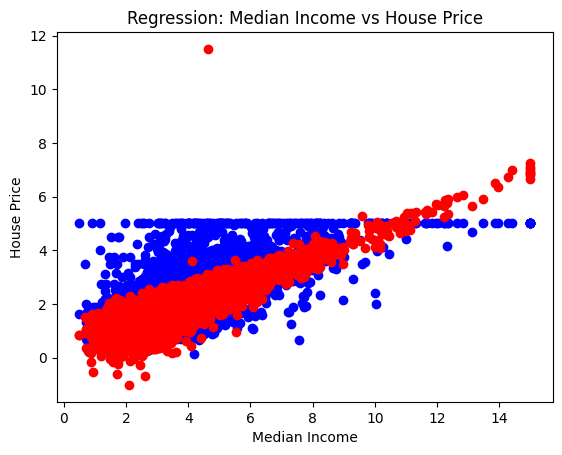

In [25]:
plt.scatter(X_test['MedInc'], y_test, color='blue')
plt.scatter(X_test['MedInc'], y_pred, color='red')
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Regression: Median Income vs House Price")
plt.show()